# **Waze User Churn Prediction**

### **Background on the Waze scenario** 

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. 

We are going to analyze and interpret data, generate valuable insights, and help leadership make informed business decisions to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. 

This project is part of a larger effort at Waze to increase growth. Typically, high retention rates indicate satisfied users who repeatedly use the Waze app over time. Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze’s business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as: 

* Who are the users most likely to churn?

* Why do users churn? 

* When do users churn? 



**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

**Part 1:** Ethical considerations
* What are the ethical implications of such a project?

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Performing feature selection, extraction, and transformation to prepare the data for modeling.

**Part 3:** Modeling

* Building the models, evaluating them, and advising on next steps.

## **PACE: Plan**

Following questions should be considered in the planning stage:

1.   What have we been asked to do?
> _Predict if a customer will churn or be retained._

2.   What are the ethical implications of the model? What are the consequences of the model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?
  > _Waze will fail to take proactive measures to retain users who are likely to stop using the app. For example, Waze might proactively push an app notification to users, or send a survey to better understand user dissatisfaction._
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?
  > _Waze may take proactive measures to retain users who are NOT likely to churn. This may lead to an annoying or negative experience for loyal users of the app._
3.   Do the benefits of such a model outweigh the potential problems?
  > _The proactive measures taken by Waze might have unintended effects on users, and these effects might encourage user churn. Follow-up analysis on the effectiveness of the measures is recommended. If the measures are reasonable and effective, then the benefits will most likely outweigh the problems._
4.  Should we proceed with the request to build this model? Why or why not?

  >_Yes. There aren't any significant risks for building such a model._


# Dataset Overview

This project utilizes a dataset called `waze_dataset.csv`, which contains synthetic data created for this project in partnership with Waze. The dataset is designed to examine user behavior and predict whether a user has churned or remained active on the Waze app during the course of a month. The dataset consists of 14,999 rows, each representing a unique user, and contains 12 columns, each providing different information about the users.

## Column Descriptions

1. **label (obj)**: This is the binary target variable indicating whether a user has churned ("retained") or remained active ("churned") during the month.

2. **sessions (int)**: The number of times a user opened the Waze app during the month.

3. **drives (int)**: The number of occurrences where a user drove at least 1 kilometer using the app during the month.

4. **device (obj)**: The type of device that a user used to start a session with the Waze app.

5. **total_sessions (float)**: A model estimate of the total number of sessions a user has had since they onboarded to the app.

6. **n_days_after_onboarding (int)**: The number of days that have passed since a user signed up for the Waze app.

7. **total_navigations_fav1 (int)**: The total number of navigations a user has made to their favorite place 1 since onboarding.

8. **total_navigations_fav2 (int)**: The total number of navigations a user has made to their favorite place 2 since onboarding.

9. **driven_km_drives (float)**: The total number of kilometers driven by the user during the month.

10. **duration_minutes_drives (float)**: The total duration, in minutes, driven by the user during the month.

11. **activity_days (int)**: The number of days in the month during which the user opened the Waze app.

12. **driving_days (int)**: The number of days in the month during which the user drove at least 1 kilometer using the app.

This dataset provides valuable information for analyzing user engagement and predicting user churn within the Waze app. It includes both behavioral and demographic features that can be used for data analysis and predictive modeling.


In [347]:
# Packages for data manipulation
import numpy as np
import pandas as pd

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

# Machine learning techniques
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

import pickle

In [348]:
# Importing dataset
df0 = pd.read_csv('waze_dataset.csv')

In [349]:
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [350]:
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [351]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## **PACE: Analyze**

### Feature Engineering

In [352]:
df = df0.copy()

#### **`km_per_driving_day`**

We're creating `km_per_driving_day` feature which will represent the mean number of kilometers driven on each driving day in the last month for each user.

In [353]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe()

c:\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [354]:
df.loc[df['km_per_driving_day'] == np.inf, 'km_per_driving_day'] = 0

df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### **`percent_sessions_in_last_month`**

We're creating `percent_sessions_in_last_month` feature  that represents the percentage of each user's total sessions that were logged in their last month of use.


In [355]:
df['total_sessions'] = df['total_sessions'].round()

df['percent_sessions_in_last_month'] = df.sessions / df.total_sessions

df['percent_sessions_in_last_month'].describe()

count    14998.000000
mean         0.449247
std          0.286829
min          0.000000
25%          0.196517
50%          0.423077
75%          0.687500
max          1.000000
Name: percent_sessions_in_last_month, dtype: float64

#### **``professional_driver``**

We're creating `professional_driver` feature  that is a 1 for users who had 60 or more drives AND drove
on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [356]:
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

df['professional_driver'].describe()

count    14999.000000
mean         0.172945
std          0.378212
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: professional_driver, dtype: float64

#### **`total_sessions_per_day`**

Here we are creating a new column that represents the mean number of sessions per day _since onboarding_.

In [357]:
df['total_sessions_per_day'] = df.total_sessions / df.n_days_after_onboarding

df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338701
std          1.314434
min          0.000000
25%          0.051038
50%          0.100739
75%          0.216430
max         39.750000
Name: total_sessions_per_day, dtype: float64

#### **`km_per_drive`**

We're creating a column representing the mean number of kilometers per drive made in the last month for each user.

In [358]:
df['km_per_drive'] = df.driven_km_drives / df.drives

df['km_per_drive'].describe()

c:\Python310\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [359]:
df.loc[df['km_per_drive'] == np.inf , 'km_per_drive'] = 0

df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

### Dropping missing values

In [360]:
df.isna().sum()

ID                                  0
label                             700
sessions                            0
drives                              0
total_sessions                      0
n_days_after_onboarding             0
total_navigations_fav1              0
total_navigations_fav2              0
driven_km_drives                    0
duration_minutes_drives             0
activity_days                       0
driving_days                        0
device                              0
km_per_driving_day                  0
percent_sessions_in_last_month      1
professional_driver                 0
total_sessions_per_day              0
km_per_drive                        0
dtype: int64

Since there are 700 observations with missing values which comprise less than 5% of the data, w're using the `dropna()` method to drop the rows that are missing this data.

There are alternate ways of treating missing values which depends on case to case basis.

In [361]:
df.dropna(inplace=True,ignore_index=True)

### Outliers

Since tree-based models are resilient to outliers, there is no need to make any imputations.

### Variable encoding

#### **Dummying features**

In order to use `device` as an X variable, we are converting it to binary.

* `Android` -> `0`
* `iPhone` -> `1`

In [362]:
df['device2'] = df.device.map({'Android': 0, 'iPhone': 1})

In [363]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_drive,device2
0,0,retained,283,226,297.0,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.952862,1,0.130492,11.632058,0
1,1,retained,133,107,327.0,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406728,0,0.266939,128.186173,1
2,2,retained,114,95,136.0,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.838235,0,0.051301,32.201567,0
3,3,retained,49,40,68.0,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.720588,0,4.533333,22.839778,1
4,4,retained,84,68,168.0,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.500000,1,0.107554,58.091206,0


#### **Target encoding**

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Therefore, we're changing the data type of the `label` column to binary. 

* `Retained` -> `0`
* `Churned` -> `1`

In [364]:
df['label2'] = df.label.map({'retained': 0, 'churned': 1})

### Feature selection

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

It is to be noted, however, that `device` won't be used simply because it's a copy of `device2`.

In [365]:
df.drop(columns='ID', inplace=True, axis=1)

###  Evaluation metric

Before modeling, we must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

In [366]:
df.label.value_counts(normalize=True)

label
retained    0.822633
churned     0.177367
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

It was already determined during the planning stage that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, **we  will select the model based on the recall score.**

## **PACE: Construct**

###  Modeling workflow and model selection process

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable. We will proceed as follows:

1. Split the data into train/validation/test sets (60/20/20). In this case, a 60/20/20 split would result in 2,860 samples in the validation set and the same number in the test set, of which 18% or 515 samples would represent users who churn.
2. We'll fit models and tune hyperparameters on the training set.
3. Perform final model selection on the validation set.
4. Assess the champion model's performance on the test set.


### Splitting the data

Split the data into features/target variable and training/validation/test sets.

In [367]:
# Defining features and target variable

X = df.drop(columns=['label', 'label2', 'device'])

y = df['label2']

In [368]:
#Training and Test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Splitting training data into training and validation set

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [369]:
X_train.shape , X_test.shape, X.shape

((11438, 16), (2860, 16), (14298, 16))

## Modeling

###  1. Random forest

We are going to use GridSearch for hyperparameter tuning while fitting the model based on best **recall** score.

In [370]:
from sklearn.metrics import make_scorer

# 1. Instantiating the random forest classifier.
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# 2. Creating a dictionary of hyperparameters to tune.
cv_params = {'max_depth': [5, 10],
             'max_features': [0.7],
             'max_samples': [0.7],
             'min_samples_leaf': [2,5],
             'min_samples_split': [2,5],
             'n_estimators': [100,200],
             }

precision_scorer = make_scorer(precision_score, zero_division=0)

# 3. Defining a dictionary of scoring metrics to capture
scoring = {'Precision': precision_scorer,
           'Recall': 'recall',
           'Accuracy': 'accuracy',
           'F1': 'f1'
          }

# 4. Instantiating the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='Recall')

### **Note: Handling Precision Warnings**
In our modeling process, we have imported the `make_scorer` function to address warnings related to the `precision_score` being 0 during model fitting. This warning typically occurs when there are no predicted positive samples in certain iterations of the model training. To mitigate this issue and ensure the smooth execution of our grid search cross-validation, we have set `zero_division=0` when creating the precision scorer. This parameter instructs scikit-learn to assign a precision of 0 when there are no predicted positives.

This approach allows us to effectively manage precision-related warnings while evaluating and optimizing our models. It's important to note that the use of `zero_division=0` is specific to our modeling context and does not affect the overall model performance or the choice of hyperparameters.


In [371]:
# %%time

# rf_model = rf_cv.fit(X_tr, y_tr)

In [372]:
# # Pickling / Saving the model

# with open('rf_model.sav', 'wb') as file:
#     pickle.dump(rf_model, file)

In [373]:
with open('rf_model.sav', 'rb') as file:
    loaded_rf_cv = pickle.load(file)

In [374]:
rf_cv = loaded_rf_cv

In [375]:
# Best score
rf_cv.best_score_

0.10186798964624677

In [376]:
# Best hyperparameters of gridsearch
rf_cv.best_params_

{'max_depth': 10,
 'max_features': 0.7,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [377]:
table = pd.DataFrame(columns= ['Model','Precision','Recall','F1','Accuracy'])
                         
    
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what we want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Creating a dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_Precision',
                   'recall': 'mean_test_Recall',
                   'f1': 'mean_test_F1',
                   'accuracy': 'mean_test_Accuracy'
                  }

    
    cv_results = pd.DataFrame(model_object.cv_results_)

  # Isolating the row of the df with the max(metric) score
    best_estimator = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

  # Extracting Accuracy, Precision, Recall, and F1 score from best metric row
    df_dict = {'Model' : model_name,
               'Precision': best_estimator.mean_test_Precision,
               'Recall': best_estimator.mean_test_Recall,
               'Accuracy': best_estimator.mean_test_Accuracy,
               'F1': best_estimator.mean_test_F1
              }
  
    global table
    table.loc[len(table)] = df_dict
                     
    return table

In [378]:
make_results('RF CV', rf_cv, 'recall')

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.477529,0.101868,0.167677,0.821171


Asside from the accuracy, the scores aren't that good. We could add more hyperparameters to a get a better score.

###  2. XGBoost

In [379]:
# 1. Instantiating the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0, n_jobs=-1)

# 2. Creating a dictionary of hyperparameters to tune
cv_params = {'learning_rate': [0.01, 0.1],
            'n_estimators': [50,100,500],
            'min_child_weight': [2,5,10],
            'subsample': [0.7],
            'colsample_bytree': [0.7],
            'max_depth': [2,5],
            }

precision_scorer = make_scorer(precision_score, zero_division=0)

# 3. Defining a dictionary of scoring metrics to capture
scoring = {'Precision': precision_scorer,
           'Recall': 'recall',
           'Accuracy': 'accuracy',
           'F1': 'f1'
          }

# 4. Instantiating the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='Recall')

In [380]:
# %%time

# xgb_cv_model = xgb_cv.fit(X_tr, y_tr)

In [381]:
# # Pickle / Saving the model

# with open('xgb_cv_model.sav', 'wb') as xgb_file:
#     pickle.dump(xgb_cv_model, xgb_file)

In [382]:
with open('xgb_cv_model.sav', 'rb') as file:
  loaded = pickle.load(file)

In [383]:
xgb_cv = loaded

In [384]:
xgb_cv.best_score_

0.17342536669542707

In [385]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 500,
 'subsample': 0.7}

In [386]:
make_results('XGB CV', xgb_cv, 'recall')

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.477529,0.101868,0.167677,0.821171
1,XGB CV,0.403225,0.173425,0.241866,0.807763


This model fit the data even better than the random forest model. The recall score is almost 70% better than the random forest model's recall score, while maintaining a similar accuracy score.

## Model selection

Now, we shall use the best random forest model and the best XGBoost model to predict on the **validation data**. Whichever performs better will be selected as the champion model.

### **Random forest**

In [387]:
# Predicting on validation data using random forest model
y_val_pred = rf_cv.best_estimator_.predict(X_val)

In [388]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Our choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for our model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy]
                          })

    return table

In [389]:
rf_val = get_test_scores('RF VAL', y_val_pred, y_val)

table = pd.concat([table, rf_val], axis=0).reset_index(drop=True)

table

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.477529,0.101868,0.167677,0.821171
1,XGB CV,0.403225,0.173425,0.241866,0.807763
2,RF VAL,0.392523,0.082840,0.136808,0.814685


#### **XGBoost**

Evaluating the scores of the XGBoost model on the validation data.

In [390]:
# Predicting on validation data using XGBoost model
xgb_val_pred = xgb_cv.best_estimator_.predict(X_val)

xgb_val = get_test_scores('XGB VAL', xgb_val_pred, y_val)

table = pd.concat([table, xgb_val], axis=0).reset_index(drop=True)

table

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.477529,0.101868,0.167677,0.821171
1,XGB CV,0.403225,0.173425,0.241866,0.807763
2,RF VAL,0.392523,0.082840,0.136808,0.814685
3,XGB VAL,0.438776,0.169625,0.244666,0.814336


## **PACE: Execute**

###  Use champion model to predict on test data

Our preferred metric is recall, and for model selection, we have chosen the champion model based on the highest recall score. While other scoring metrics may have performed less optimally for the XGBoost validation data model, recall remained superior.

In [391]:
y_final_pred = xgb_cv.best_estimator_.predict(X_test)

xgb_final = get_test_scores('XGB Test',y_final_pred, y_test)

table = pd.concat([table, xgb_final], axis=0).reset_index(drop=True)

In [392]:
table

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.477529,0.101868,0.167677,0.821171
1,XGB CV,0.403225,0.173425,0.241866,0.807763
2,RF VAL,0.392523,0.082840,0.136808,0.814685
3,XGB VAL,0.438776,0.169625,0.244666,0.814336
4,XGB Test,0.393519,0.167653,0.235131,0.806643


### Confusion matrix

Plotting a confusion matrix of the champion model's predictions on the test data.

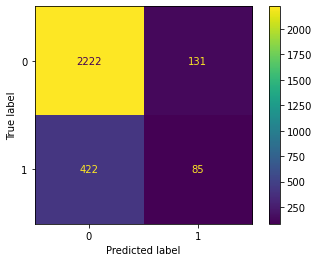

In [393]:
cm = confusion_matrix(y_test, y_final_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= xgb_cv.classes_)

disp.plot()

**Observations**

The model predicted more than three times as many false negatives than it did false positives, and it correctly identified only ~17% of the users who actually churned.

###  Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Importance score', ylabel='Features'>

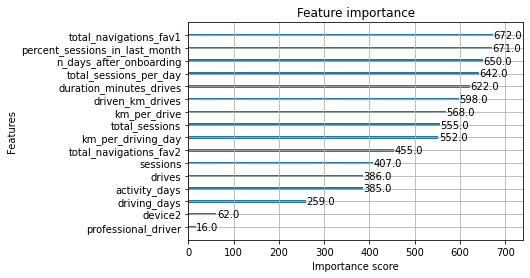

In [394]:
plot_importance(xgb_cv.best_estimator_)

### **Refining Model Performance**

1. **Model Suitability:** The choice to employ this model for churn prediction depends on its intended use. If it informs critical business decisions, its suboptimal recall score may raise concerns. However, as a tool for exploratory purposes or as a starting point, it can offer valuable insights.

2. **Data Splitting Strategy:** Our data was divided into *training*, *validation*, and *test sets*. This division allowed us to perform model selection on the validation set and evaluate the champion model on the test set. This approach yields a more robust estimate of future performance than a simple two-way split.

3. **Emphasis on Recall:** The model selection process emphasized the significance of *recall* in our context. Our focus has been on maximizing recall to reduce churn among app users by minimizing false negatives.

4. **Feature Enhancement:** To boost the model's predictive power, we can explore *feature engineering*. Notably, key features such as "*number of days after onboarding*," "*km per hour*," "*total sessions per day*," "*percent sessions in the last month*," and "*total sessions*" have shown substantial impact on churn prediction, as indicated by the XGBoost feature importance plot.

In summary, these insights and recommendations shed light on churn prediction. The paramount importance of recall in our use case ensures we effectively address churn among app users by minimizing false negatives. These considerations will drive our efforts to further enhance the model's performance.


### Further Model Tailoring for Our Use Case

#### **Optimizing the Decision Threshold**

The default decision threshold for most classification algorithms, including scikit-learn's implementations, is typically set at 0.5. This means that, in the case of the Waze models, if they predicted that a given user had a 50% probability or greater of churning, then that user was assigned a predicted value of `1`, indicating that the user was predicted to churn.

However, in situations with imbalanced datasets where the response class is a minority, this threshold might not be the most suitable. To address this, we can explore the precision-recall curve, which provides valuable insights into the trade-off between the model's precision and recall. This curve will aid in determining an optimal decision threshold that aligns more closely with our specific use case and objectives.

This approach allows us to fine-tune the model's predictions to better suit our needs and prioritize the identification of users at risk of churning.


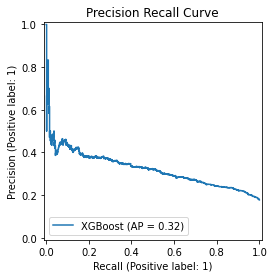

In [395]:
display = PrecisionRecallDisplay.from_estimator(xgb_cv.best_estimator_, X_test, y_test, name='XGBoost')

plt.title('Precision Recall Curve')
plt.show()

As recall increases, precision decreases. But we determined that false positives aren't much of a problem. For example, in the case of this Waze project, a false positive could just mean that a user who will not actually churn gets an email and a banner notification on their phone. It's very low risk.

So, what if instead of using the default 0.5 decision threshold of the model, we used a lower threshold of 0.4?

In [396]:
# Predicted probabilities on test data 
predicted_prob = xgb_cv.best_estimator_.predict_proba(X_test)

In [397]:
# List of probability of target i.e 1
positive_prob = np.array([x[1] for x in predicted_prob])

# Array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.4 else 0 for x in positive_prob])

In [398]:
# Evaluation metrics when the threshold is 0.4
updated_xgb = get_test_scores('XGB_threshold = 0.4', new_preds, y_test)

In [399]:
table = pd.concat([table, updated_xgb]).reset_index(drop=True)
table

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.477529,0.101868,0.167677,0.821171
1,XGB CV,0.403225,0.173425,0.241866,0.807763
2,RF VAL,0.392523,0.082840,0.136808,0.814685
3,XGB VAL,0.438776,0.169625,0.244666,0.814336
4,XGB Test,0.393519,0.167653,0.235131,0.806643
5,XGB_threshold = 0.4,0.373563,0.256410,0.304094,0.791958


Recall and F1 score increased significantly, while precision and accuracy decreased.

So, using the precision-recall curve as a guide, lets assume that we would be satisfied if the model had a recall score of 0.5 and were willing to accept the 30% precision score that comes with it. In other words, we'd be happy if the model successfully identified half of the people who will actually churn, even if it means that when the model says someone will churn, it's only correct about 30% of the time.

What threshold will yield this result? 

In [400]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Finding the threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that we want the model to have

    Outputs:
        threshold: The threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolating second column of `probabilities`
    thresholds = np.arange(0, 0.5, 0.001)    # Grid of 500 thresholds to test

    scores = []
    for threshold in thresholds:
        # New array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Appending the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculating how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Appending the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sorting `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identifying the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolating the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieving the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


Testing the function to find the threshold that results in a recall score closest to 0.5.

In [401]:
predicted_prob = xgb_cv.best_estimator_.predict_proba(X_test)

threshold_finder(y_test, predicted_prob, 0.5)

(0.20400000000000001, 0.5009861932938856)

In [402]:
new_preds = [1 if x >= 0.204 else 0 for x in positive_prob]

In [403]:
updated_xgb = get_test_scores('XGB_threshold = 0.204', new_preds, y_test)
table = pd.concat([table, updated_xgb], axis=0).reset_index(drop=True)
table

,Model,Precision,Recall,F1,Accuracy
0,RF CV,0.477529,0.101868,0.167677,0.821171
1,XGB CV,0.403225,0.173425,0.241866,0.807763
2,RF VAL,0.392523,0.082840,0.136808,0.814685
3,XGB VAL,0.438776,0.169625,0.244666,0.814336
4,XGB Test,0.393519,0.167653,0.235131,0.806643
5,XGB_threshold = 0.4,0.373563,0.256410,0.304094,0.791958
6,XGB_threshold = 0.204,0.319899,0.500986,0.390469,0.722727


# Conclusion

In conclusion, our modeling efforts have resulted in a significant increase in recall, reaching 50%. While this improvement is notable, it's crucial to recognize that it has come at the cost of reduced precision and accuracy. 

In our current scenario, where churn reduction among app users is paramount, the focus has been on minimizing false negatives. False negatives represent cases where our model predicts that a customer won't churn when they actually would. Missing out on these customers could have adverse consequences, hence the emphasis on maximizing recall.

Additionally, we have further refined our model by tuning the decision threshold and incorporating test scores into our results table. These efforts have contributed to a more nuanced understanding of our model's performance.

These observations provide context for our modeling choices, highlight the trade-offs made to prioritize recall, and underscore our commitment to delivering actionable insights to the Waze leadership team.




